In [1]:
%matplotlib inline
# When using the 'inline' backend, your matplotlib graphs will be included in your notebook, next to the code.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
np.random.seed(0)
plt.style.use("ggplot")

import tensorflow as tf

In [2]:
data = pd.read_csv("ner_dataset.csv", encoding="latin1")
data = data.fillna(method="ffill")
data.head(20)

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O
5,Sentence: 1,through,IN,O
6,Sentence: 1,London,NNP,B-geo
7,Sentence: 1,to,TO,O
8,Sentence: 1,protest,VB,O
9,Sentence: 1,the,DT,O


In [3]:
print("Unique words in corpus:", data['Word'].nunique())
print("Unique tags in corpus:", data['Tag'].nunique())

Unique words in corpus: 35178
Unique tags in corpus: 17


In [4]:
# makes a list of unique words
words = list(set(data["Word"].values))
words.append("ENDPAD")
num_words = len(words)

In [5]:
# makes a list of unique tags
tags = list(set(data["Tag"].values))
num_tags = len(tags)

In [6]:
class SentenceGetter(object):
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, p, t) for w, p, t in zip(s["Word"].values.tolist(),
                                                           s["POS"].values.tolist(),
                                                           s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("Sentence #").apply(agg_func)
        self.sentences = [s for s in self.grouped]
    
    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [7]:
getter = SentenceGetter(data)
sentences = getter.sentences

In [8]:
sentences[0]

[('Thousands', 'NNS', 'O'),
 ('of', 'IN', 'O'),
 ('demonstrators', 'NNS', 'O'),
 ('have', 'VBP', 'O'),
 ('marched', 'VBN', 'O'),
 ('through', 'IN', 'O'),
 ('London', 'NNP', 'B-geo'),
 ('to', 'TO', 'O'),
 ('protest', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('war', 'NN', 'O'),
 ('in', 'IN', 'O'),
 ('Iraq', 'NNP', 'B-geo'),
 ('and', 'CC', 'O'),
 ('demand', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('withdrawal', 'NN', 'O'),
 ('of', 'IN', 'O'),
 ('British', 'JJ', 'B-gpe'),
 ('troops', 'NNS', 'O'),
 ('from', 'IN', 'O'),
 ('that', 'DT', 'O'),
 ('country', 'NN', 'O'),
 ('.', '.', 'O')]

In [9]:
sentences[200]

[('Advance', 'NNP', 'O'),
 ('copies', 'NNS', 'O'),
 ('of', 'IN', 'O'),
 ('the', 'DT', 'O'),
 ('United', 'NNP', 'B-org'),
 ('Nations', 'NNPS', 'I-org'),
 ("'", 'POS', 'O'),
 ('internal', 'JJ', 'O'),
 ('audit', 'NN', 'O'),
 ('of', 'IN', 'O'),
 ('its', 'PRP$', 'O'),
 ('oil-for-food', 'NN', 'O'),
 ('program', 'NN', 'O'),
 ('reportedly', 'RB', 'O'),
 ('show', 'VBP', 'O'),
 ('that', 'IN', 'O'),
 ('U.N.', 'NNP', 'B-geo'),
 ('officials', 'NNS', 'O'),
 ('wasted', 'VBD', 'O'),
 ('money', 'NN', 'O'),
 ('and', 'CC', 'O'),
 ('overlooked', 'VBD', 'O'),
 ('massive', 'JJ', 'O'),
 ('overcharges', 'NNS', 'O'),
 ('by', 'IN', 'O'),
 ('contractors', 'NNS', 'O'),
 ('.', '.', 'O')]

In [10]:
word2idx = {w: i + 1 for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}

In [12]:
word2idx

{'Sheehan': 1,
 'intimidated': 2,
 'jcfundrzr@aol.com': 3,
 'Jaber': 4,
 'KIM': 5,
 'Frazier': 6,
 'meaning': 7,
 'Christiane': 8,
 'Vivanco': 9,
 'Ile': 10,
 'climbs': 11,
 'Scandinavian': 12,
 'PAD': 13,
 '10-percent': 14,
 'Chakul': 15,
 'Vries': 16,
 'board': 17,
 'certified': 18,
 'Jaafar': 19,
 'competitors': 20,
 'hang': 21,
 'Puente': 22,
 'moved': 23,
 'Fazul': 24,
 'piano': 25,
 'Lucio': 26,
 'heavily-fortified': 27,
 'internal': 28,
 '1806': 29,
 'visa': 30,
 'wheelchair': 31,
 'frequent': 32,
 'Horizon': 33,
 'anti-viral': 34,
 'Kubis': 35,
 'gunshots': 36,
 'pro-Taliban': 37,
 'bloodiest': 38,
 'Shuai': 39,
 'Fleihan': 40,
 'shrugged': 41,
 'mane': 42,
 'Woodrow': 43,
 'bovine': 44,
 'protest': 45,
 'Houses': 46,
 'Gazette': 47,
 'accumulation': 48,
 'mortal': 49,
 'batons': 50,
 'picked': 51,
 'deserves': 52,
 'rioted': 53,
 '6.3': 54,
 'Aghazadeh': 55,
 'insulting': 56,
 'ventilation': 57,
 '7,000': 58,
 'Meteorologists': 59,
 'Chairperson': 60,
 'Angelus': 61,
 'pneumon

In [13]:
tag2idx

{'I-org': 0,
 'B-art': 1,
 'I-eve': 2,
 'B-nat': 3,
 'I-art': 4,
 'B-tim': 5,
 'B-gpe': 6,
 'I-gpe': 7,
 'B-eve': 8,
 'I-geo': 9,
 'I-nat': 10,
 'I-per': 11,
 'B-geo': 12,
 'I-tim': 13,
 'B-org': 14,
 'B-per': 15,
 'O': 16}

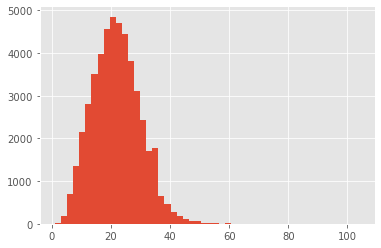

In [14]:
# Analyse length of sentences in dataset 
plt.hist([len(s) for s in sentences], bins=50)
plt.show()

In [15]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
# pad_sequences is used to ensure that all sequences in a list have the same length. By default this is done by padding 0 in the beginning of each sequence until each sequence has the same length as the longest sequence. Here I use post padding
max_len = 50

X = [[word2idx[w[0]] for w in s] for s in sentences]
X = pad_sequences(maxlen=max_len, sequences=X, padding="post", value=num_words-1)

y = [[tag2idx[w[2]] for w in s] for s in sentences]
y = pad_sequences(maxlen=max_len, sequences=y, padding="post", value=tag2idx["O"])

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [17]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import LSTM, Embedding, Dense
from tensorflow.keras.layers import TimeDistributed, SpatialDropout1D, Bidirectional

In [18]:
input_word = Input(shape=(max_len,))
model = Embedding(input_dim=num_words, output_dim=50, input_length=max_len)(input_word)
model = SpatialDropout1D(0.1)(model)
model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(model)
out = TimeDistributed(Dense(num_tags, activation="softmax"))(model)
model = Model(input_word, out)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 50, 50)            1758950   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 50, 50)            0         
_________________________________________________________________
bidirectional (Bidirectional (None, 50, 200)           120800    
_________________________________________________________________
time_distributed (TimeDistri (None, 50, 17)            3417      
Total params: 1,883,167
Trainable params: 1,883,167
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [37]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from livelossplot.inputs.tf_keras import PlotLossesCallback

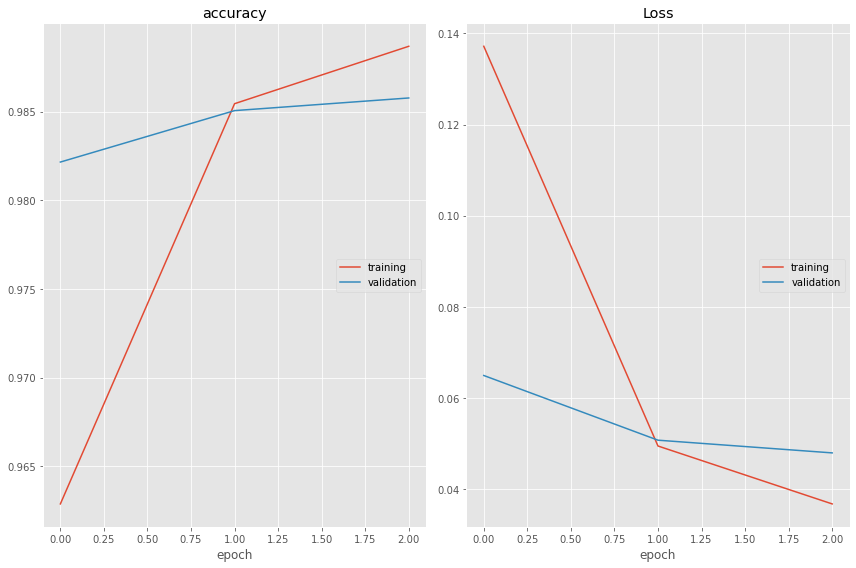

accuracy
	training         	 (min:    0.963, max:    0.989, cur:    0.989)
	validation       	 (min:    0.982, max:    0.986, cur:    0.986)
Loss
	training         	 (min:    0.037, max:    0.137, cur:    0.037)
	validation       	 (min:    0.048, max:    0.065, cur:    0.048)

Epoch 00003: val_loss improved from 0.05071 to 0.04792, saving model to model_weights.h5
1199/1199 [==============================] - 137s 114ms/step - loss: 0.0367 - accuracy: 0.9887 - val_loss: 0.0479 - val_accuracy: 0.9858
Wall time: 7min 27s


In [38]:
%%time
# %%time prints the wall time for the entire cell 
chkpt = ModelCheckpoint("model_weights.h5", monitor='val_loss',verbose=1, save_best_only=True, save_weights_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=1, verbose=0, mode='max', baseline=None, restore_best_weights=False)
callbacks = [PlotLossesCallback(), chkpt, early_stopping]
history = model.fit(
    x=x_train,
    y=y_train,
    validation_data=(x_test,y_test),
    batch_size=32, 
    epochs=3,
    callbacks=callbacks,
    verbose=1
)

In [39]:
model.evaluate(x_test, y_test)

300/300 [==============================] - 4s 13ms/step - loss: 0.0479 - accuracy: 0.9858


[0.04792441427707672, 0.9857714772224426]

In [40]:
i = np.random.randint(0, x_test.shape[0]) #659
p = model.predict(np.array([x_test[i]]))
p = np.argmax(p, axis=-1)
y_true = y_test[i]
print("{:15}{:5}\t {}\n".format("Word", "True", "Pred"))
print("-" *30)
for w, true, pred in zip(x_test[i], y_true, p[0]):
    print("{:15}{}\t{}".format(words[w-1], tags[true], tags[pred]))

Word           True 	 Pred

------------------------------
Officials      O	O
are            O	O
scheduled      O	O
to             O	O
publish        O	O
their          O	O
closely-watchedO	O
economic       O	O
assessment     O	O
Wednesday      B-tim	B-tim
afternoon      I-tim	I-tim
,              O	O
Washington     B-org	B-geo
time           O	O
.              O	O
depict         O	O
depict         O	O
depict         O	O
depict         O	O
depict         O	O
depict         O	O
depict         O	O
depict         O	O
depict         O	O
depict         O	O
depict         O	O
depict         O	O
depict         O	O
depict         O	O
depict         O	O
depict         O	O
depict         O	O
depict         O	O
depict         O	O
depict         O	O
depict         O	O
depict         O	O
depict         O	O
depict         O	O
depict         O	O
depict         O	O
depict         O	O
depict         O	O
depict         O	O
depict         O	O
depict         O	O
depict         O	O
depict         O	O
depic